# Multi Variate Analysis 

Here what we are going to do is to check our sleep quality against more than one variables. Target is to understand how <b>Sleep Quality</b> is affected by different factors in our dataset

This dataset has been taken from <a href="https://www.kaggle.com/danagerous/sleep-data"> Kaggle </a>. 
We transformed the dataset in our earlier posts so that we have the information in the form we need.
For more please visit my visit <a href = "https://github.com/umairk83/hands_on_stuff"> Github Repo </a> and <a href="https://medium.com/listening-data"> Listening Data </a>

## Problem Statement ? 

As of now, we do not have particular question statement. We are trying to predict the sleep quality by supplying more than one argument.

### Import statements

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [72]:
# Load data and see what we got

data = pd.read_csv("Sleep data transformed.csv")

data.head()

,Sid,Sleep Quality,Time in Bed,Wake up,Sleep Notes,Heart Rate,Worked Out,Stressed,Late Meal,Caffeinated,Minutes in Bed
0,1,100,8:32,Good,NaN,59,NaN,NaN,NaN,NaN,512
1,2,3,0:16,Ok,Stressful day,72,False,True,False,LOW,16
2,3,98,8:30,Ok,NaN,57,NaN,NaN,NaN,NaN,510
3,4,65,7:32,NaN,NaN,59,NaN,NaN,NaN,NaN,452
4,5,72,6:44,Good,Drank coffee:Drank tea,68,False,False,False,HIGH,404


### Selecting the data we need

In [73]:
# Check the type of data we got in this dataset and observe the features

print("Column names in the data are: " , data.columns)
print("We have %s observations in %s features." % (data.shape[0], data.shape[1]))


Column names in the data are:  Index(['Sid', 'Sleep Quality', 'Time in Bed', 'Wake up', 'Sleep Notes',
       'Heart Rate', 'Worked Out', 'Stressed', 'Late Meal', 'Caffeinated',
       'Minutes in Bed'],
      dtype='object')
We have 887 observations in 11 features.


In [74]:
# Checking the type of features in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sid             887 non-null    int64 
 1   Sleep Quality   887 non-null    int64 
 2   Time in Bed     887 non-null    object
 3   Wake up         246 non-null    object
 4   Sleep Notes     652 non-null    object
 5   Heart Rate      887 non-null    int64 
 6   Worked Out      652 non-null    object
 7   Stressed        652 non-null    object
 8   Late Meal       652 non-null    object
 9   Caffeinated     652 non-null    object
 10  Minutes in Bed  887 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 76.4+ KB


In [75]:
# We can see that there are only 4 continuous variables in our data. Rest are not continuius rather discrete.
# We omit object type features as it can make analysis a bit different for us. 

data = data.drop(columns= [ 'Wake up', 'Sleep Notes', 'Worked Out', 'Stressed', 'Late Meal', 'Caffeinated'], axis = 1)


### Multi collinearity ? 

We can see in the above data that the <b> Time in Bed </b> and <b> Minutes in Bed </b> are analogous to each other. In other words, Time in Bed is the redundant piece of information, not giving us any different / real piece of information. We need to exclude this from our dataset.

In [76]:
# Removing Time in Bed

data = data.drop(columns=["Time in Bed"], axis = 1)


I also drop Sid as this is just the row number of the data.

In [77]:
data = data.drop(columns = ["Sid"], axis = 1)

### Cleaning the data

In [78]:
# We check if there is any null value present in the data or not. 

data.isnull().any()

Sleep Quality     False
Heart Rate        False
Minutes in Bed    False
dtype: bool

As there is no null item present we can easily move forward. If there were any nulls in the data, we would need to handle that which is not required in our case.

## Studying Features and Targets

Now that we have got our dataset with the columns that we need, now we make the distribution histograms and check for the skewness. This is important as it allows to find and identify the outliers.

In [79]:
# Check statistical information of the data

data.describe()

,Sleep Quality,Heart Rate,Minutes in Bed
count,887.000000,887.000000,887.000000
mean,74.895152,60.500564,458.043968
std,15.433292,3.696706,78.966785
min,0.000000,49.000000,0.000000
25%,69.000000,58.000000,439.000000
50%,77.000000,60.000000,464.000000
75%,84.000000,63.000000,492.000000
max,100.000000,98.000000,646.000000


Our <b> Features</b> are: <i> Heart Rate </i> and <i> Minutes in Bed </i>
And <b> Target </b> is: <i> Sleep Quality </i>

### Heart Rate

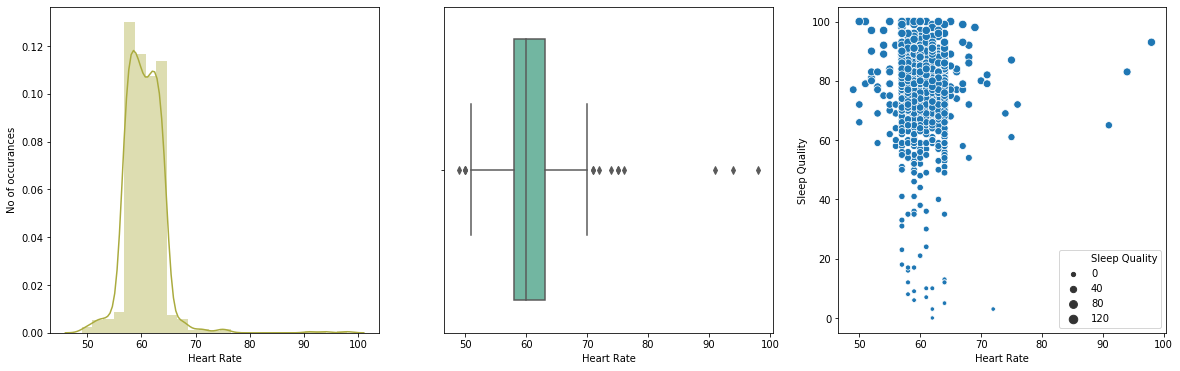

In [136]:
# We create histogram to check for Normal Distribution
# We create scatter plot and box plot to find the outliers.

cmap = sns.cubehelix_palette(dark=.1, light=.9, as_cmap=True)
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20, 6), ncols=3, sharey=False)

ax1.set(xlabel='Heart Rate', ylabel='No of occurances')
sns.distplot(data['Heart Rate'], bins=25, color="#aaab3e", ax = ax1)

ax2.set(xlabel='Heart Rate')
sns.boxplot(x=data['Heart Rate'], ax = ax2, orient="h", palette="Set2")

ax3.set(xlabel="Heart Rate", ylabel="Sleep Quality")
sns.scatterplot(x="Heart Rate", y="Sleep Quality", data=data, size="Sleep Quality", palette=cmap)

plt.show()

Clearly we can see that our <b> Heart Rate</b> is normally distributed. Further we can see some outliers in the Scatter Plot. We see that the heart rate with values > 90 seem to be outlier. In the real world scenario we would consult with some <b> Domain Expert </b> for the treatment of such values

Further from the graph we can also see that <b> Heart Rate </b> does not seem to affect the <b> Sleep Quality </b> in a well defined pattern. Since we have almost found the cloud of points in the graph, it seems to indicate that Heart Rate is insignificant for Sleep Quality

In [143]:
# Find the skewness of Heart Rate
skew_heart_rate = data['Heart Rate'].skew()

# Find correlation of Heart Rate and Sleep Quality
corr_heart_rate = data['Heart Rate'].corr(data['Sleep Quality'])

print('Skewness of Heart Rate: ' ,  skew_heart_rate)
print('Correlation of Heart Rate with Sleep Quality: ' ,  corr_heart_rate)

Skewness of Heart Rate:  2.7748450063394183
Correlation of Heart Rate with Sleep Quality:  0.0016529202233250765


Above we can see that the correlation is very close to 0, indicating that <b> Heart Rate </b> does not much affect the <b> Sleep Quality </b>. Based on this we can also drop <b> Heart Rate </b> as well.

### Minutes in Bed

Like above, we perform the same analysis for Minutes in Bed

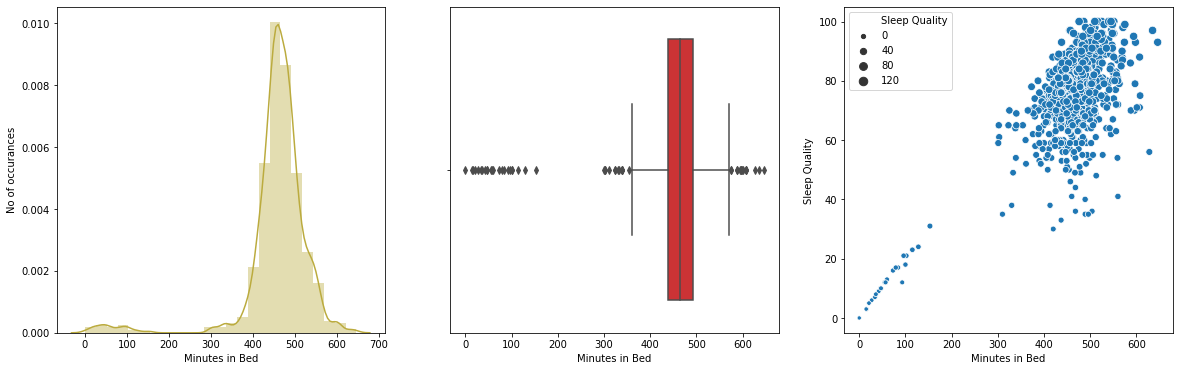

In [145]:
# We create histogram to check for Normal Distribution
# We create scatter plot and box plot to find the outliers.

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20, 6), ncols=3, sharey=False)

ax1.set(xlabel='Minutes in Bed', ylabel='No of occurances')
sns.distplot(data['Minutes in Bed'], bins=25, color="#bbab3e", ax = ax1)

ax2.set(xlabel='Minutes in Bed')
sns.boxplot(x=data['Minutes in Bed'], ax = ax2, orient="h", palette="Set1")

ax3.set(xlabel="Minutes in Bed", ylabel="Sleep Quality")
sns.scatterplot(x="Minutes in Bed", y="Sleep Quality", data=data, size="Sleep Quality", palette=cmap)

plt.show()

In [147]:
# Find the skewness and correlation of Sleep Quality with Minutes in Bed

skew_minutes_in_bed = data['Minutes in Bed'].skew()

# Find correlation of Heart Rate and Sleep Quality
corr_minutes_in_bed = data['Minutes in Bed'].corr(data['Sleep Quality'])

print('Skewness of Minutes in Bed: ' ,  skew_minutes_in_bed)
print('Correlation of Minutes in Bed with Sleep Quality: ' ,  corr_minutes_in_bed)


Skewness of Minutes in Bed:  -3.1646049919616
Correlation of Minutes in Bed with Sleep Quality:  0.7113527462008298


We important observations can be seen from the above operations:
1. We see that the Minutes in Bed is very strongly correlated to the Sleep Quality. This means that if you are spending more time in bed, you tend to get better sleep.
2. There are many observations below 300 minutes. We cannot treat them as outliers as there are multiple such observations. We might need to handle this situation or we can accept it, as it is, for the time being.
3. Minutes in Bed affects the Sleep Quality in a very definite pattern.

### Sleep Quality

For the sake of completeness, lets see if <b> Sleep Quality </b> column contains some outliers or not

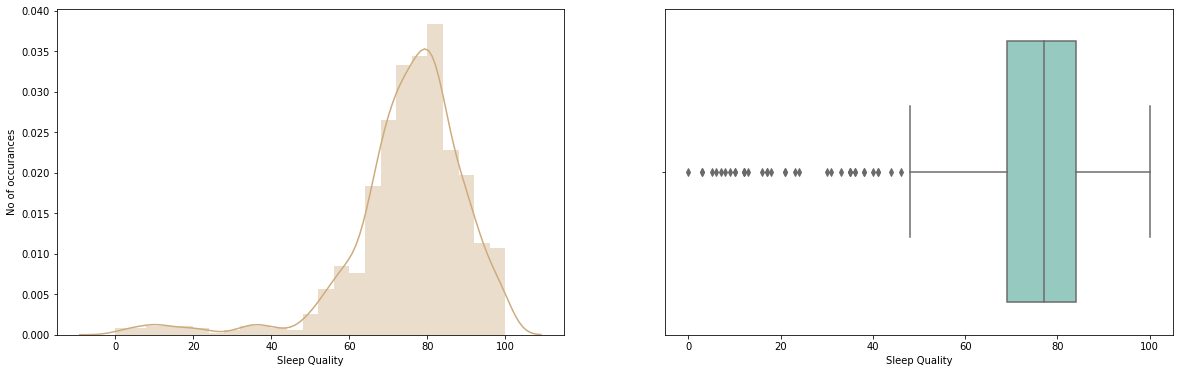

In [153]:
# We create histogram to check for Normal Distribution
# We create scatter plot and box plot to find the outliers.

fig, (ax1, ax2) = plt.subplots(figsize=(20, 6), ncols=2, sharey=False)

ax1.set(xlabel='Sleep Quality', ylabel='No of occurances')
sns.distplot(data['Sleep Quality'], bins=25, color="#cdab7e", ax = ax1)

ax2.set(xlabel='Sleep Quality')
sns.boxplot(x=data['Sleep Quality'], ax = ax2, orient="h", palette="Set3")

plt.show()

There seems to be values at the left of the distribution, corresponding to the same values we save earlier in the <b>Minutes in Bed </b>. But as we agreed to keep these, lets keep them for now

### Heat Map of Correlation

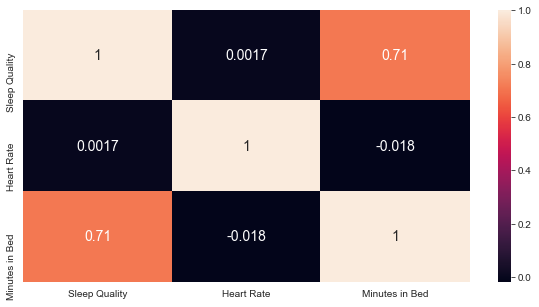

In [166]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot = True, annot_kws={"size": 14})
plt.show()

From above we can see that <b> Heart Rate</b> and <b> Minutes in Bed </b> are not strongly correlated. Hence we can accept both the variables in our model

## Individual Linear Regression

Before we can work on finding the Multiple Variable Regression, we might wanna see how the individual linear regression works out. By doing this we shall see how each feature in our consideration affects our target variable

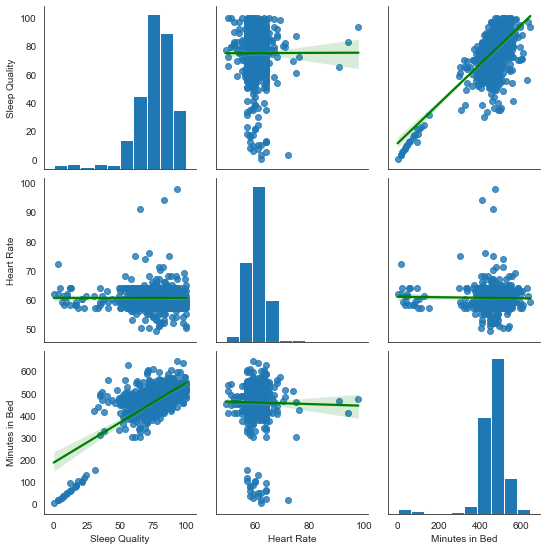

In [169]:
sns.pairplot(data, kind="reg", plot_kws = { 'line_kws': {'color': 'green'}})

plt.show()

Above we can see that <b> Sleep Quality </b> is affected significantly by the <b> Minutes in Bed </b> but <b> Hear Rate </b> does not much affects the <b> Sleep Quality </b>. Hence we get the almost <i> horizontal </i> line for the Heart Rate.

### Multiple Variable Regression

Multiple variable regression basically combines both Linear Regressions into one equation. 

In [233]:
# We shuffle and split our dataset into training and test sets

sleep_quality = data['Sleep Quality']
features = data.drop(columns = ['Sleep Quality'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, sleep_quality, test_size=0.3, random_state = 6)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(620, 2)
(620,)
(267, 2)
(267,)


In [192]:
# We fit our model and print out how well it does

regr = LinearRegression()
regr.fit(X_train, y_train)

coefficients_data_frame = pd.DataFrame(data = regr.coef_, index = X_train.columns, columns = ['Coefficients'])

coefficients_data_frame.head()

,Coefficients
Heart Rate,0.098026
Minutes in Bed,0.137208


We can clearly see that <b> Heart Rate </b> coefficient is very small almost close to 0

### How well does our Model do?

In [197]:
# Evaluating performance

print('Intercept: ', regr.intercept_)
print('Model fit for training data: ', regr.score(X_train, y_train))
print('Model fit for test data: ', regr.score(X_test, y_test))


Intercept:  6.395420906324816
Model fit for training data:  0.5004804902439759
Model fit for test data:  0.5167762453676156


It means that we could explain some 50% variance of our training data and 51% of our test data. While this is neither good nor bad, it may be low because we did not consider all the features in our dataset.

### Remove outliers

During our heart rate we had seen that our Heart Rate feature has some outliers. We might need to remove those and see if its increases our performance or not

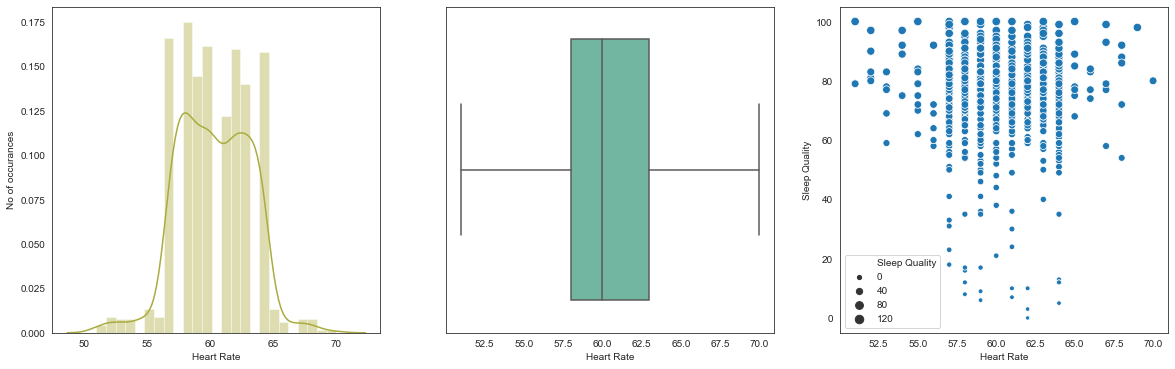

In [231]:
# Removing all the observations where heart rate is greater than 70

data_outliers_removed = data[(data['Heart Rate'] > 50) & (data['Heart Rate'] < 71)]

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20, 6), ncols=3, sharey=False)

ax1.set(xlabel='Heart Rate', ylabel='No of occurances')
sns.distplot(data_outliers_removed['Heart Rate'], bins=25, color="#aaab3e", ax = ax1)

ax2.set(xlabel='Heart Rate')
sns.boxplot(x=data_outliers_removed['Heart Rate'], ax = ax2, orient="h", palette="Set2")

ax3.set(xlabel="Heart Rate", ylabel="Sleep Quality")

sns.scatterplot(x="Heart Rate", y="Sleep Quality", data=data_outliers_removed, size="Sleep Quality", palette=cmap)

plt.show()

In [232]:
# We shuffle and split our dataset into training and test sets

sleep_quality_or = data_outliers_removed['Sleep Quality']
features_or = data_outliers_removed.drop(columns = ['Sleep Quality'], axis = 1)

X_train_or, X_test_or, y_train_or, y_test_or = train_test_split(features_or, sleep_quality_or, test_size=0.3, random_state = 6)

print(X_train_or.shape)
print(X_test_or.shape)
print(y_train_or.shape)
print(y_test_or.shape)

(611, 2)
(262, 2)
(611,)
(262,)


In [234]:
# We fit our model and print out how well it does

regr_or = LinearRegression()
regr_or.fit(X_train_or, y_train_or)

coefficients_data_frame_or = pd.DataFrame(data = regr_or.coef_, index = X_train_or.columns, columns = ['Coefficients'])

coefficients_data_frame_or.head()

,Coefficients
Heart Rate,0.069157
Minutes in Bed,0.138525


We can see that the Coefficient for Heart Rate is changed to 0.06 from 0.09

In [235]:
# Evaluating performance

print('Intercept: ', regr_or.intercept_)
print('Model fit for training data: ', regr_or.score(X_train_or, y_train_or))
print('Model fit for test data: ', regr_or.score(X_test_or, y_test_or))

Intercept:  7.032106796521532
Model fit for training data:  0.5055691074801651
Model fit for test data:  0.4745043007472298


From above we can see that our model was not affected by the outliers in the Hear Rate. In real world scenarios, we always have to judge and understand from more than one models to see which one does perfect for us.

### Outliers in Sleep Quality

From our visualizations above we can see that the Sleep Quality is distributed between two groups. Perhaps making it a single group might help in improving the quality of our model

In [247]:
# Removing all the observations where sleep quality is less than or equal to 30

data_outliers_sq = data[data['Sleep Quality'] < 40]

sleep_quality_sq = data_outliers_sq['Sleep Quality']
features_sq = data_outliers_sq.drop(columns = ['Sleep Quality'], axis = 1)

X_train_sq, X_test_sq, y_train_sq, y_test_sq = train_test_split(features_sq, sleep_quality_sq, test_size=0.3, random_state = 6)

regr_sq = LinearRegression()
regr_sq.fit(X_train_sq, y_train_sq)

coefficients_data_frame_sq = pd.DataFrame(data = regr_sq.coef_, index = X_train_sq.columns, columns = ['Coefficients'])

coefficients_data_frame_sq.head()

,Coefficients
Heart Rate,-0.844069
Minutes in Bed,0.056093


In [250]:
# Evaluating performance

print('Intercept: ', regr_sq.intercept_)
print('Model fit for training data: ', regr_sq.score(X_train_sq, y_train_sq))
print('Model fit for test data: ', regr_sq.score(X_test_sq, y_test_sq))

print('No of observations in our dataset: ', X_train_sq.shape[0])


Intercept:  61.012678560730095
Model fit for training data:  0.8737094530072127
Model fit for test data:  0.814747952638919
No of observations in our dataset:  22


## Conclusion

In this notebook we demonstrated how <b> Multiple Variable Regression </b> works. We also tried to see how we could remove the outliers and made different models to gauge the prediction power.

So as we can see that if just considered only those observations where Sleep Quality was below 40 we get a really good fit. It means that in order to increase the performance and prediction power of our model, we either need to increase the number of observations or include the features we excluded earlier for the sake of simplicity